In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math
from scipy.integrate import solve_ivp

In [91]:
N = 120
sigma = 0.43
eta = 0.04
T = 1000

In [121]:
omegas = np.random.normal(0,sigma,N)


In [93]:
 def K_phi(phi):
        return np.sin(phi) + eta*(1 - np.cos(phi))

In [135]:
class Kuramoto:
    def __init__(self, theta0, length, duration):
        self.theta = np.zeros(length)
        self.v = np.zeros(length)
        self.theta[0] = theta0
        self.duration = duration
        
        
    def K_phi(self,phi):
        return np.sin(phi) + eta*(1 - np.cos(phi))
    
    def RHS(self,t,theta):
        #omega = omegas[i]
        #print(f'theta is {theta}')
        omega = np.random.normal(0,sigma,1)

        psi_0 = np.roll(theta,-1)
        psi_1 = theta
        psi_2 = np.roll(theta,1)
        a1 = K_phi(psi_2 - psi_1)
        a2 = K_phi(psi_0 - psi_1)
        y = (a1 + a2 + omega)
        y[0] = 0
        y[-1] = 0
        return  y
    
    
    def solve(self):
        sol = solve_ivp(self.RHS,[0,T],self.theta,method='LSODA')
        
        self.theta = sol.y
        return
        
    
    
    def force(self,psi_2,i=0):
        #omega = omegas[i]
        omega = np.random.normal(0,sigma,1)
        psi_0 = self.theta[i]
        psi_1 = self.theta[i+1]
        a1 = K_phi(psi_2 - psi_1)
        a2 = K_phi(psi_0 - psi_1)
        return  a1 + a2 + omega - omega_bar
    
    
    
    def analytical(self,i=0):
        A = np.cos(self.theta[i+1]) - eta * np.sin(self.theta[i+1])
        B = - np.sin(self.theta[i+1]) - eta*np.cos(self.theta[i+1])
        C = omega_bar - K_phi(self.theta[i] - self.theta[i+1]) - omegas[i] - eta
        answer = math.asin(C/(np.sqrt(A**2 +B**2))) - math.atan(B/A)
        return answer

    def find_phase_profile(self):
        for i in range(self.t - 1):
            self.theta[i+2] = fsolve(self.force,self.theta[i+1]+0.5,args=i)[0]
            #self.theta[i+2] = self.analytical(i)
            print('force: ' + str(self.force(self.theta[i+2],i)))
        return
    
    def find_dt_theta(self):
        for i in range(self.t-1):
            for j in range(self.t-1):
                psi_0 = self.theta[i]
                psi_1 = self.theta[i+1]
                psi_2 = self.theta[i+2]
                a1 = K_phi(psi_2 - psi_1)
                a2 = K_phi(psi_0 - psi_1)
                self.v[i] += a1 + a2
            self.v[i] += np.mean(omegas)
        return
    
    def find_phase_profile_2(self):
        for i in range(self.t):
            self.theta[i] = self.theta[i] % (2 * np.pi)
        return
    
    #continuum version
    def force_cont(self, x, v):
        v1 = - 1 * np.multiply(eta, v**2)
        y = np.add(v1, omega_bar)
        return y
    
    
    def RK2(self, Dt):
        for i in range(self.t):
            kx1 = self.v[i]
            kv1 = force(self.theta[i],self.v[i])

            kx2 = kx1 + np.multiply(Dt/2, kv1)
            kv2 = force(self.theta[i]+np.multiply(Dt/2,kx1),kx2)

            w = np.random.normal(0,sigma,1)
            self.theta[i+1] = self.theta[i] + np.multiply(Dt/2,(np.add(kx1, kx2)))
            self.v[i + 1] = self.v[i] + np.multiply(Dt/2, (np.add(kv1, kv2))) + np.multiply(w,np.sqrt(Dt))
        return

In [136]:
eg = Kuramoto(0,N,T)
eg.RHS(eg.theta,1)
eg.solve()

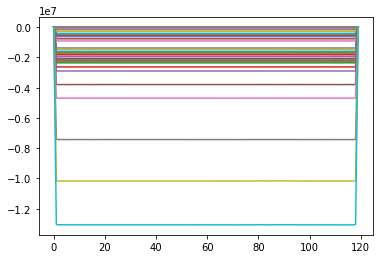

In [137]:
plt.plot(eg.theta)
plt.show()

In [138]:
transpose = np.transpose(eg.theta)

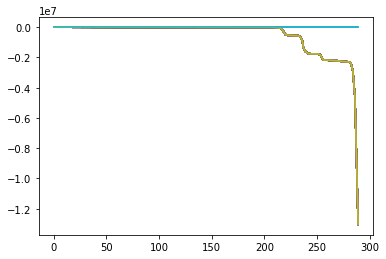

In [139]:
plt.plot(transpose)
plt.show()

In [120]:
eg.find_dt_theta()
plt.plot(eg.v[1:-2])

AttributeError: 'Kuramoto' object has no attribute 't'

In [131]:
a = (eg.theta[0] + np.pi) % 2*np.pi - np.pi

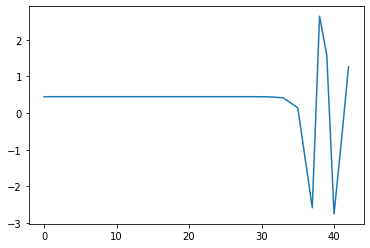

In [132]:
plt.plot(a)